In [31]:
import pandas as pd
import seaborn as sns
import numpy as np

In [12]:
data=pd.read_csv('heights_zscore.csv')
data

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [20]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


In [34]:
import matplotlib.pyplot as plt
from scipy.stats import norm

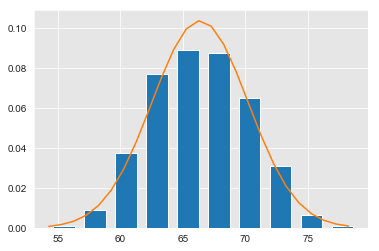

In [41]:
plt.hist(data['height'],density=True,rwidth=0.7)
rng=np.arange(data.height.min(),data.height.max())
plt.plot(rng,norm.pdf(rng,data.height.mean(),data.height.std()))

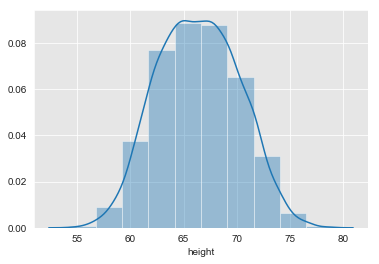

In [40]:
sns.distplot(data['height'],bins=10)

In [42]:
data.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

## Removing Outlier Using Standard Deviation 

In [44]:
upper_limit=data['height'].mean()+ 3*data.height.std()
upper_limit

77.91014411725232

In [45]:
lower_limit=data['height'].mean() - 3*data.height.std()
lower_limit

54.824975392478876

In [46]:
data[(data['height']>upper_limit) | (data['height']<lower_limit)] #These are the outliers

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [48]:
data[(data['height']<upper_limit) & (data['height']>lower_limit)] #This is the data without outliers

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243



## Removing Outlier Z-Score

In [52]:
data['z-score']=(data.height-data.height.mean())/data.height.std()
data

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [55]:
data[(data['z-score']>-3) & (data['z-score']<3)]

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


## Exercise 

In [81]:
data=pd.read_csv('bhp.csv')
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


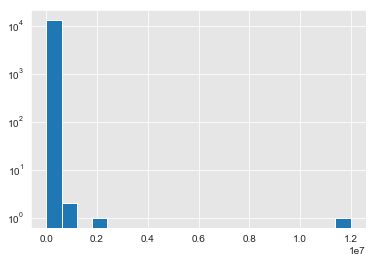

In [84]:
plt.hist(data.price_per_sqft,bins=20)
plt.yscale('log')

In [85]:
max_limit = data.price_per_sqft.mean() + 4*data.price_per_sqft.std()
min_limit = data.price_per_sqft.mean() - 4*data.price_per_sqft.std()
max_limit, min_limit

(434828.97805485805, -418988.3045700096)

In [90]:
outlier_r_data=data[(data['price_per_sqft']<max_limit) & (data['price_per_sqft']>min_limit)]
outlier_r_data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [91]:
data.shape[0]-outlier_r_data.shape[0]

4

(array([1.285e+04, 3.260e+02, 1.300e+01, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.670000e+02, 1.842030e+04, 3.657360e+04, 5.472690e+04,
        7.288020e+04, 9.103350e+04, 1.091868e+05, 1.273401e+05,
        1.454934e+05, 1.636467e+05, 1.818000e+05, 1.999533e+05,
        2.181066e+05, 2.362599e+05, 2.544132e+05, 2.725665e+05,
        2.907198e+05, 3.088731e+05, 3.270264e+05, 3.451797e+05,
        3.633330e+05]),
 <a list of 20 Patch objects>)

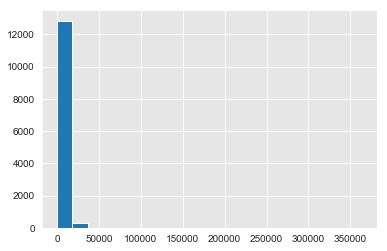

In [96]:
plt.hist(outlier_r_data['price_per_sqft'],bins=20)

In [ ]:
max_limit = outlier_r_data.price_per_sqft.mean() + 4*outlier_r_data.price_per_sqft.std()
min_limit = outlier_r_data.price_per_sqft.mean() - 4*outlier_r_data.price_per_sqft.std()
max_limit, min_limit